In [64]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
all_months_data = pd.DataFrame()

In [5]:
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [15]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


missed value lar mevcut hatta tamamen boş gözlemler var tabloda önce onlarla bi ilgilenmek gerekli.

In [19]:
all_data.isna().sum() 
# belli ki boş olan satırlar ver öyle bir iki özelliği eksik kayıt yok. 

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [20]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [24]:
# veri tiplerini ayarlamak lazım bir de.
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [29]:
non_numeric_rows = all_data[~all_data['Quantity Ordered'].str.isnumeric()]
print(non_numeric_rows) # 355 tane satır saçma verilerle dolu ! count() ile bulabilirsin.

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address]
Index: []


In [35]:
# all_data = all_data[all_data['Quantity Ordered'].str.isnumeric()]
print(non_numeric_rows.count())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [32]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [36]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Augment data with additional columns

###### Add month column
daha önce defalarca yaptığım bir satırdaki karakter dzilerinin içerisinden bir kısmı alıp farklı bir özellik olarak df e ekleyeceğim. önce kolon isimleri değiştirilebilir ama. ChatGPT bu konuda hep en büyük yardımcı.

In [37]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [43]:
# Kolon isimleri için sözlük oluştur
column_names = {
    'Order ID': 'order_id',
    'Product': 'product',
    'Quantity Ordered': 'quantity_ordered',
    'Price Each': 'price_each',
    'Order Date': 'order_date',
    'Purchase Address': 'purchase_address'
}

# Kolonları yeniden adlandır
all_data.rename(columns=column_names, inplace=True)
# rename fonksiyonuna sözlük vermek gerekiyor maalesef. liste olmuyor.

In [44]:
all_data.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address', 'month'],
      dtype='object')

In [45]:
# order_date i parçalayıp ay değerini elde edeceğiz
all_data["month"] = all_data["order_date"].str.split("/").str.get(0)

In [57]:
all_data["order_date"].str.split("/",expand = True) # buradan istediğini seçebilirsin aslında.

,0,1,2
0,04,19,19 08:46
2,04,07,19 22:30
3,04,12,19 14:38
4,04,12,19 14:38
5,04,30,19 09:27
...,...,...,...
186845,09,17,19 20:56
186846,09,01,19 16:00
186847,09,23,19 07:39
186848,09,19,19 17:30


In [56]:
all_data["month"] = all_data["month"].astype(int)

In [60]:
all_data["day"] = all_data["order_date"].str.split("/",expand = True)[1]
all_data["year"] = all_data["order_date"].str.split("/" , expand = True)[2].str.split(" ",expand = True)[0]

all_data["day"] = all_data["day"].astype(int)
all_data["year"] = all_data["year"].astype(int)

In [61]:
all_data["hour"] = all_data["order_date"].str.split("/" , expand = True)[2].str.split(" ",expand = True)[1]

In [62]:
all_data.head(3)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day,year,hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,08:46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19,22:30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,14:38


In [65]:
# her bir siparişten toplam kazanç hesaplanabilir.
all_data["total_price"] = all_data["quantity_ordered"] * all_data["price_each"]

In [68]:
all_data.head(1)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day,year,hour,total_price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,08:46,23.9


##### purchase_address özelliğini de parçalayarak , cadde , şehir , Eyalet ve posta kodu bilgisini ayrı sütunlarda görebiliriz.

Bu veri, bir alışveriş veya teslimat adresini belirtir ve genellikle şu bileşenlerden oluşur:

Sokak Adresi ve Numarası: 917 1st St

917: Binanın numarası

1st St: Sokak adı (1. Cadde)

Şehir: Dallas

Alışverişin yapıldığı veya teslimatın yapılacağı şehir.

Eyalet: TX

TX: Texas, ABD'nin bir eyaleti. ABD'de eyaletler genellikle iki harfli kısaltmalarla belirtilir.

Posta Kodu: 75001

Bu, adresin bulunduğu bölgeyi belirten beş haneli bir posta kodudur. Posta kodları, adreslerin daha hızlı ve doğru bir şekilde
teslim edilmesini sağlar.

In [90]:
# Adres verisini parçalara ayırma
all_data['street_address'] = all_data["purchase_address"].str.split("," , expand = True)[0]

In [93]:
all_data['city'] = all_data["purchase_address"].str.split("," , expand = True)[1]

In [99]:
all_data['state'] = all_data["purchase_address"].str.split("," , expand = True)[2].str.split(" ",expand = True)[1]

In [100]:
all_data.head(2)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day,year,hour,total_price,street_address,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,08:46,23.90,917 1st St,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19,22:30,99.99,682 Chestnut St,Boston,MA


###### artık purchase_address ve order_date sütunları gereksiz hale geldi. , quantity_ordered	price_each sütunları belki ek bilgi için tabloda bulunabilir ancak ben istediğim sütunları seçerek yeni bir dataframe oluşturmaya karar verdim.

In [101]:
df = all_data[["order_id","product","quantity_ordered","price_each","total_price","day","month","year","state","city","street_address"]]

In [103]:
df.head() # street address özelliğini bu şekliyle sevdim..

,order_id,product,quantity_ordered,price_each,total_price,day,month,year,state,city,street_address
0,176558,USB-C Charging Cable,2,11.95,23.90,19,4,19,TX,Dallas,917 1st St
2,176559,Bose SoundSport Headphones,1,99.99,99.99,7,4,19,MA,Boston,682 Chestnut St
3,176560,Google Phone,1,600.00,600.00,12,4,19,CA,Los Angeles,669 Spruce St
4,176560,Wired Headphones,1,11.99,11.99,12,4,19,CA,Los Angeles,669 Spruce St
5,176561,Wired Headphones,1,11.99,11.99,30,4,19,CA,Los Angeles,333 8th St


## What was the best month for sales? How much was earned that month?

In [128]:
result_df = df.groupby("month")["total_price"].agg(["sum","mean"]).sort_values(by ="sum" ,ascending = False)

In [109]:
df.groupby("month")["total_price"].sum().max()

4613443.34

In [114]:
df.groupby("month")["total_price"].sum().idxmax()

12

3 farklı gösterim bir arada da olabilirdi. index değerini ve toplam değerini ayrı değişkenlerde toplayıp prit edebilirdim.

Görselleştirelimmmm:)

Text(0.5, 1.0, 'Aylara Göre Toplam Kazanç Grafiği')

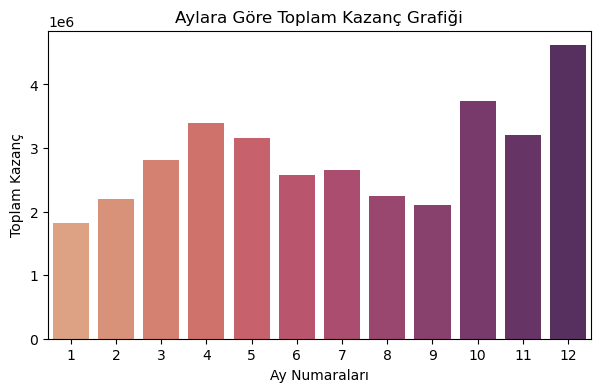

In [148]:
plt.figure(figsize=(7, 4))

sns.barplot(data = result_df.reset_index() , x = "month" , y = "sum" ,palette = "flare" ) # aylara göre kazanç miktarı , önemli olan kısım.

plt.xlabel("Ay Numaraları")
plt.ylabel("Toplam Kazanç")
plt.title("Aylara Göre Toplam Kazanç Grafiği")


<Axes: xlabel='month', ylabel='mean'>

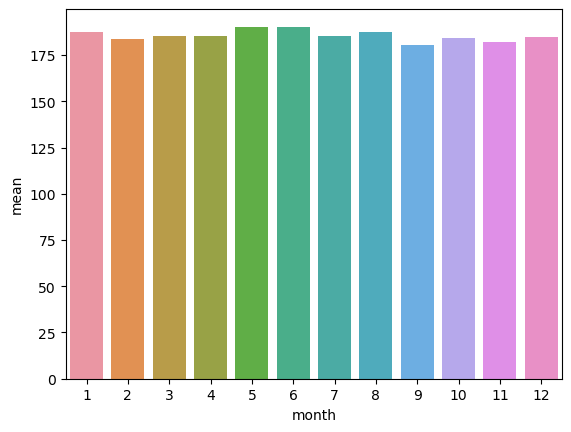

In [139]:
sns.barplot(data = result_df.reset_index() , x = "month" , y = "mean") # ortalama kazanç bu da

<Axes: title={'center': 'Aylara Göre Ortalama Kazanç Grafiği'}, xlabel='Ay Numaraları', ylabel='Toplam Kazanç'>

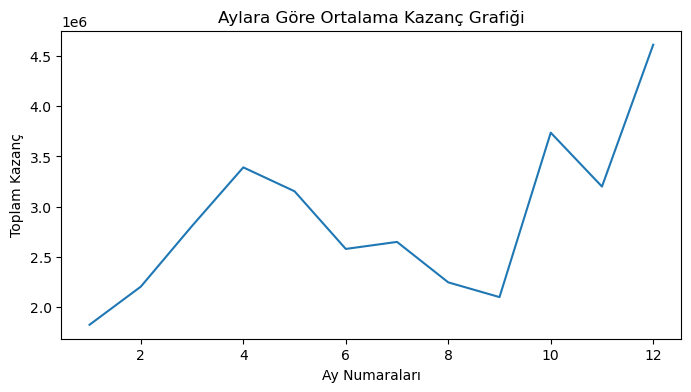

In [223]:
plt.figure(figsize=(8, 4))
plt.xlabel("Ay Numaraları")
plt.ylabel("Toplam Kazanç")
plt.title("Aylara Göre Ortalama Kazanç Grafiği")

sns.lineplot(data = result_df.reset_index() , x = "month" , y = "sum" )

### What city sold the most product?

In [149]:
df.head(3)

,order_id,product,quantity_ordered,price_each,total_price,day,month,year,state,city,street_address
0,176558,USB-C Charging Cable,2,11.95,23.90,19,4,19,TX,Dallas,917 1st St
2,176559,Bose SoundSport Headphones,1,99.99,99.99,7,4,19,MA,Boston,682 Chestnut St
3,176560,Google Phone,1,600.00,600.00,12,4,19,CA,Los Angeles,669 Spruce St


In [176]:
df.groupby("city")["total_price"].agg(["sum","mean"]).sort_values(by = "sum" , ascending =False)

,sum,mean
city,,
San Francisco,8262203.91,184.704550
Los Angeles,5452570.80,184.177362
New York City,4664317.43,187.502711
Boston,3661642.01,183.688272
Atlanta,2795498.58,187.856903
Dallas,2767975.40,186.772969
Seattle,2747755.48,186.516120
Portland,2320490.61,186.160498
Austin,1819581.75,183.703357


In [155]:
genis_df = df.groupby(["city","month"])["total_price"].agg(["sum","mean"])

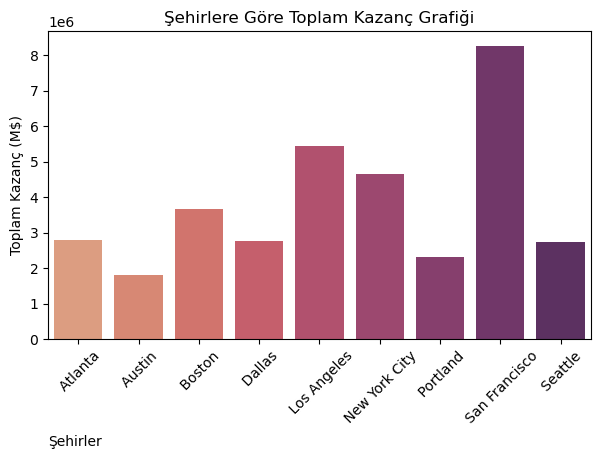

In [180]:
plt.figure(figsize=(7, 4))

sns.barplot(data = df.groupby("city")["total_price"].agg(["sum","mean"]).reset_index() ,
            x = "city" ,
            y = "sum" ,
            palette = "flare" ) # aylara göre kazanç miktarı , önemli olan kısım.

plt.xlabel("Şehirler", loc = "left")
plt.ylabel("Toplam Kazanç (M$)")
plt.title("Şehirlere Göre Toplam Kazanç Grafiği")
plt.xticks(rotation=45);


In [191]:
df.head(1)

,order_id,product,quantity_ordered,price_each,total_price,day,month,year,state,city,street_address
0,176558,USB-C Charging Cable,2,11.95,23.9,19,4,19,TX,Dallas,917 1st St


In [195]:
df.groupby(["state","city"])["total_price"].agg(["sum"]) # 2 tane Portland varmış...
# parçalama işini buna göre yaparak tekrara değerlendirebiliriz, bu şekilde daha güvenilir bir sonuç elde ederiz.

sum
state city                      
CA     Los Angeles    5452570.80
       San Francisco  8262203.91
GA     Atlanta        2795498.58
MA     Boston         3661642.01
ME     Portland        449758.27
NY     New York City  4664317.43
OR     Portland       1870732.34
TX     Austin         1819581.75
       Dallas         2767975.40
WA     Seattle        2747755.48

In [200]:
df_02 = df.groupby("month")["quantity_ordered"].agg(["sum","mean"]).reset_index()

<Axes: >

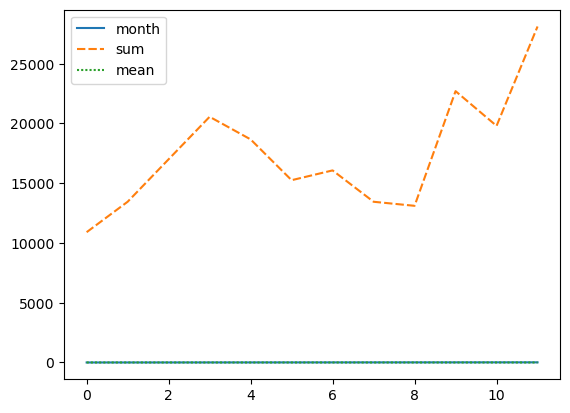

In [222]:
sns.lineplot(data = df_02)
# satılan ürün sayısı ile kazanç arasındaki ilişkiyi değerlendirebilirsin. 


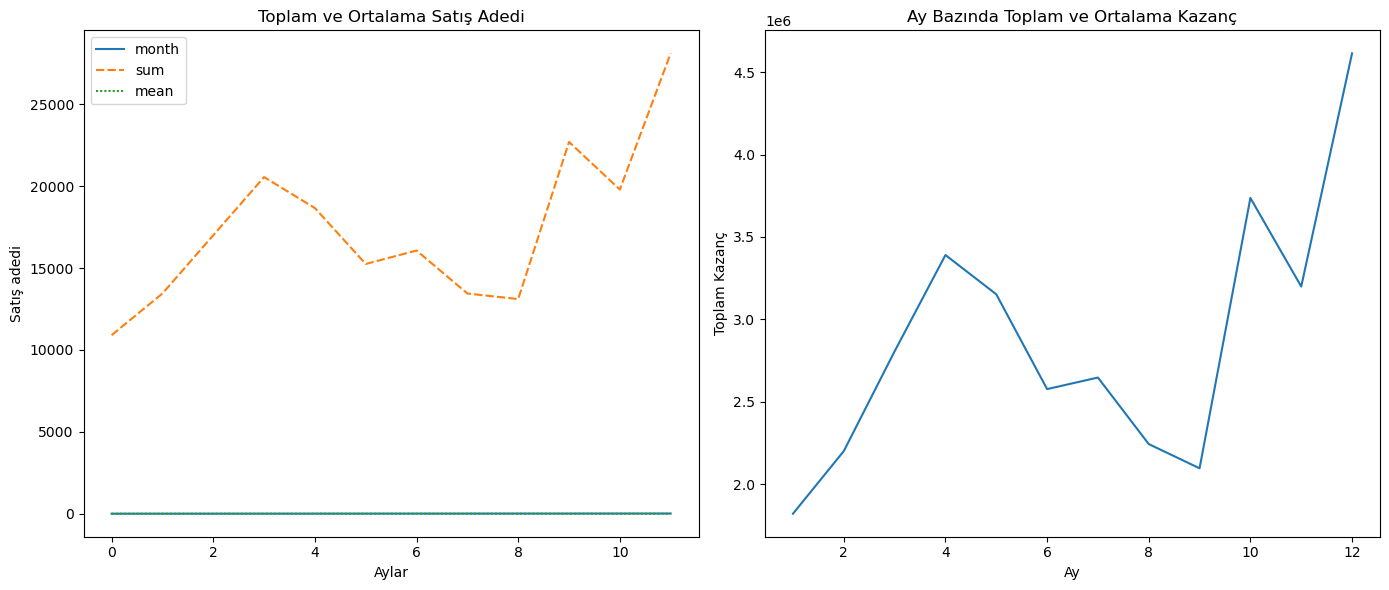

In [225]:
# 1. ve 2. grafiklerin veri ve ayarlarını tanımla
data_1 = df_02  # İlk grafikte kullanılacak veri
data_2 = result_df.reset_index()  # İkinci grafikte kullanılacak veri

# Grafiklerin düzeni için alt grafikler oluştur
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 satır, 2 sütun

# İlk grafiği oluştur
sns.lineplot(data=data_1, ax=ax[0])
ax[0].set_title("Toplam ve Ortalama Satış Adedi")  # İkinci grafikteki başlığı belirle

# İkinci grafiği oluştur
sns.lineplot(data=result_df.reset_index() , x = "month" , y = "sum", ax=ax[1])
ax[1].set_title("Ay Bazında Toplam ve Ortalama Kazanç")  # İkinci grafikteki başlığı belirle

# Grafiklerin başlıklarını, eksen etiketlerini ve diğer ayarlarını yap
ax[0].set_xlabel("Aylar")
ax[0].set_ylabel("Satış adedi")

ax[1].set_xlabel("Ay")
ax[1].set_ylabel("Toplam Kazanç")

# Grafiklerin arasındaki boşlukları ayarla
plt.tight_layout()

# Grafikleri göster
plt.show()

In [226]:
# üstteki grafik ile kafayı yemek işten değil. oyandıkça değişiyor direkt.

In [282]:
# rastgele bir grafik daha çizeyim. Ürün Fiyatına göre satış yoğunluğu. 

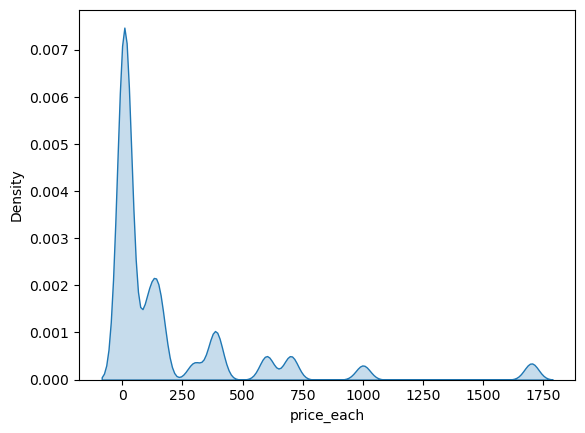

In [283]:
sns.kdeplot( data = df , x = df["price_each"] , fill = True);

In [229]:
all_data.head(2) # order_date i parçalamanın daha güzel olan bir yolu daha var...

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day,year,hour,total_price,street_address,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,08:46,23.90,917 1st St,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19,22:30,99.99,682 Chestnut St,Boston,MA


### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [232]:
all_data["order_date"] = pd.to_datetime(all_data["order_date"]) ;

In [233]:
all_data.head(2)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day,year,hour,total_price,street_address,city,state
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,19,08:46,23.90,917 1st St,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,19,22:30,99.99,682 Chestnut St,Boston,MA


In [239]:
all_data["Hour"] = all_data["order_date"].dt.hour

In [241]:
all_data.head(1) # saat direkt geldi :)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day,year,hour,total_price,street_address,city,state,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,19,08:46,23.9,917 1st St,Dallas,TX,8


In [245]:
all_data["Minute"] = all_data["order_date"].dt.minute

all_data['Count'] = 1

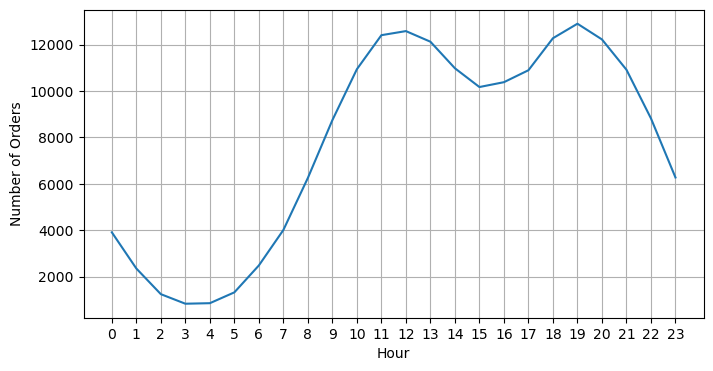

In [255]:
plt.figure(figsize=(8, 4))
keys = all_data.groupby(['Hour']).count().index

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.xticks(keys)
plt.grid()
plt.show()


saat 10-11 arası insanlar daha çok para harcıyor diyebiliriz. daha fazla sipariş oluşturulmuş çünkü.

### What products are most often sold together?

Order ID değeri aynı olan siparişler birlikte sipariş edilmiş demektir.

In [258]:
df.head() # Google Phone , Wired Headphones yani 3 ve 4. satırlar aynı siparişe ait.

,order_id,product,quantity_ordered,price_each,total_price,day,month,year,state,city,street_address
0,176558,USB-C Charging Cable,2,11.95,23.90,19,4,19,TX,Dallas,917 1st St
2,176559,Bose SoundSport Headphones,1,99.99,99.99,7,4,19,MA,Boston,682 Chestnut St
3,176560,Google Phone,1,600.00,600.00,12,4,19,CA,Los Angeles,669 Spruce St
4,176560,Wired Headphones,1,11.99,11.99,12,4,19,CA,Los Angeles,669 Spruce St
5,176561,Wired Headphones,1,11.99,11.99,30,4,19,CA,Los Angeles,333 8th St


In [301]:
df_1 = df[df["order_id"].duplicated(keep = False)]; # false demememin sebebi , tekrarlı veriler silinmesin diye.

In [302]:
df_1.head()

,order_id,product,quantity_ordered,price_each,total_price,day,month,year,state,city,street_address
3,176560,Google Phone,1,600.00,600.00,12,4,19,CA,Los Angeles,669 Spruce St
4,176560,Wired Headphones,1,11.99,11.99,12,4,19,CA,Los Angeles,669 Spruce St
18,176574,Google Phone,1,600.00,600.00,3,4,19,CA,Los Angeles,20 Hill St
19,176574,USB-C Charging Cable,1,11.95,11.95,3,4,19,CA,Los Angeles,20 Hill St
30,176585,Bose SoundSport Headphones,1,99.99,99.99,7,4,19,MA,Boston,823 Highland St


In [303]:
df_1["Grouped"] = df_1.groupby("order_id")["product"].transform(lambda x : ",".join(x))

C:\Users\Abdulkadir\AppData\Local\Temp\ipykernel_4152\3725398356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Grouped"] = df_1.groupby("order_id")["product"].transform(lambda x : ",".join(x))


In [304]:
df_1.head()

,order_id,product,quantity_ordered,price_each,total_price,day,month,year,state,city,street_address,Grouped
3,176560,Google Phone,1,600.00,600.00,12,4,19,CA,Los Angeles,669 Spruce St,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,12,4,19,CA,Los Angeles,669 Spruce St,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,3,4,19,CA,Los Angeles,20 Hill St,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,3,4,19,CA,Los Angeles,20 Hill St,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,7,4,19,MA,Boston,823 Highland St,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [305]:
# bu sefer de tekrarlı veriler bi tık sorun oldu gibi. Onlardan kurtulalım...

In [308]:
df_1 = df_1[["order_id","Grouped"]].drop_duplicates();


In [309]:
df_1.head()

,order_id,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [312]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What product sold the most? Why do you think it sold the most?

In [314]:
all_data.head(3)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day,year,hour,total_price,street_address,city,state,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,19,08:46,23.90,917 1st St,Dallas,TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,19,22:30,99.99,682 Chestnut St,Boston,MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,14:38,600.00,669 Spruce St,Los Angeles,CA,14,38,1


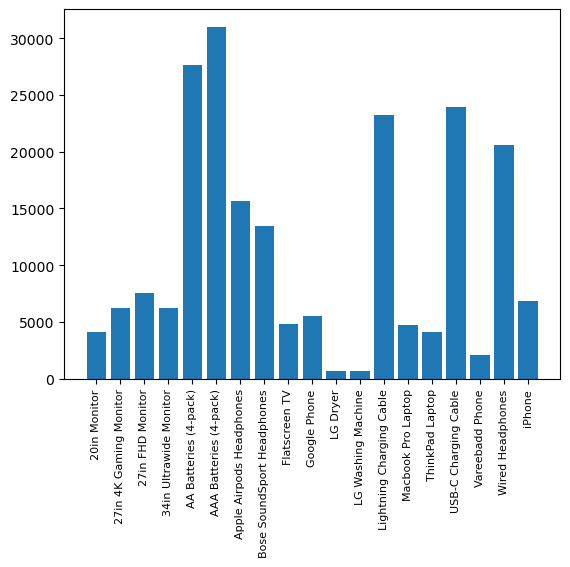

In [319]:
product_group = all_data.groupby('product')
Quantity_ordered = product_group['quantity_ordered'].sum()

keys = [pair for pair, df in product_group]
plt.bar(keys, Quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\Abdulkadir\AppData\Local\Temp\ipykernel_4152\3433691537.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Abdulkadir\AppData\Local\Temp\ipykernel_4152\3433691537.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() #2 tane y ekseni var bu kısım kafa karıştırıcı olabilir.


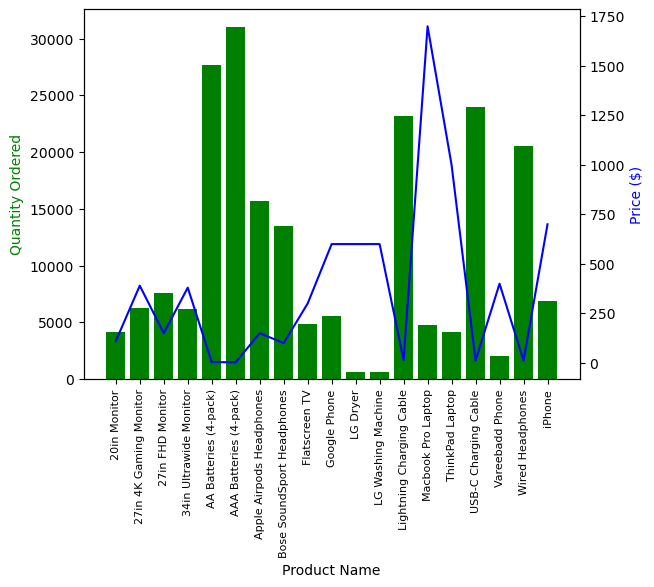

In [322]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('product')['price_each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, Quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show() 
# 2 tane y ekseni var bu kısım kafa karıştırıcı olabilir.
# fiyat arttıkça alınan adet sayısı azalmış , aşağıdaki grafikte bu görülüyor.
# yukarıda bunu yapmaya çalışmıştım ancak bu kadar güzel olmamıştı.